In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 'D:\Dokumenty\Komputry\Python\datasets\zgony.csv'
df = pd.read_csv(data, 
                 encoding='cp1250',
                 sep=';',
                 parse_dates=['data_rap_zgonu'],
                 index_col='data_rap_zgonu'
                )

In [23]:
# convert dtypes
df = df.convert_dtypes()
df['teryt_woj'] = df['teryt_woj'].astype('Int16')
df['teryt_pow'] = df['teryt_pow'].astype('Int16')
df['wiek'] = df['wiek'].astype('Int8')

In [24]:
# rename columns and drop columns
df = (df.rename(columns={'teryt_woj':'woj', 
                   'teryt_pow':'pow',
                   'plec':'sex',
                   'wiek':'age',
                   'czy_wspolistniejace':'comorbidities',
                   'obniz_odpornosc':'weak_res',
                   'liczba_zaraportowanych_zgonow':'rep_deaths',
                   'w_pelni_zaszczepiony':'full_vax'
                  })
      .drop(columns=['kat_wiek', 'producent', 'dawka_ost'])
     )
df.index.name = 'dt'

In [25]:
# replace value coding
df['sex'] = df['sex'].replace('K','w').str.lower()

for col in ['sex','comorbidities','weak_res','full_vax']:
    df[col] = df[col].replace('T','Y').str.lower()

In [26]:
df.head()

,woj,pow,sex,age,comorbidities,weak_res,rep_deaths,full_vax
dt,,,,,,,,
2021-01-02,4,407,w,67,y,n,1,n
2021-01-02,4,407,w,90,y,n,1,n
2021-01-02,4,407,m,69,y,n,1,n
2021-01-02,4,415,m,72,y,n,1,n
2021-01-02,4,415,m,77,y,n,1,n


In [27]:
# check if nulls
df.isnull().sum()

woj              0
pow              0
sex              0
age              1
comorbidities    0
weak_res         0
rep_deaths       0
full_vax         0
dtype: int64

In [28]:
df['sex'] = df['sex'].replace('nieznana', np.NaN) # delete 'nieznana' to NaNs
df = df.dropna()

In [ ]:
# ToDos:
# 1. agg daily
# 2. agg daily - F/M
# 3. agg 7d avg
# 4. agg daily podzial wieku

In [29]:
# 1. agg daily
df_daily = df.groupby('dt')['rep_deaths'].sum()
df_daily

dt
2021-01-02     60
2021-01-03     42
2021-01-04    341
2021-01-05    553
2021-01-06    185
             ... 
2021-12-24    269
2021-12-25     16
2021-12-26     38
2021-12-27    549
2021-12-28    792
Name: rep_deaths, Length: 337, dtype: Int64

In [94]:
df_daily.name

'rep_deaths'

In [138]:
def pd_series_stats(df:pd.core.series.Series, plot:bool=True):
    """
    Generate basic statistics and plot for pandas' series
    """
    
    print(f'mean: {df.mean():.1f} \n')
    print(f'median: {np.percentile(df, 50):.1f} \n')
    print(f'standard deviation: {np.std(df):.1f} \n')
    print(f'observations: {df.size:.1f}')
    
    if plot:
        plt.figure(figsize=(15,8))
        df.plot()
        plt.ylabel(df.name)
        plt.title(f'Plot of {df.name}')
        plt.show()

mean: 197.3 

median: 95.0 

standard deviation: 215.0 

observations: 337.0


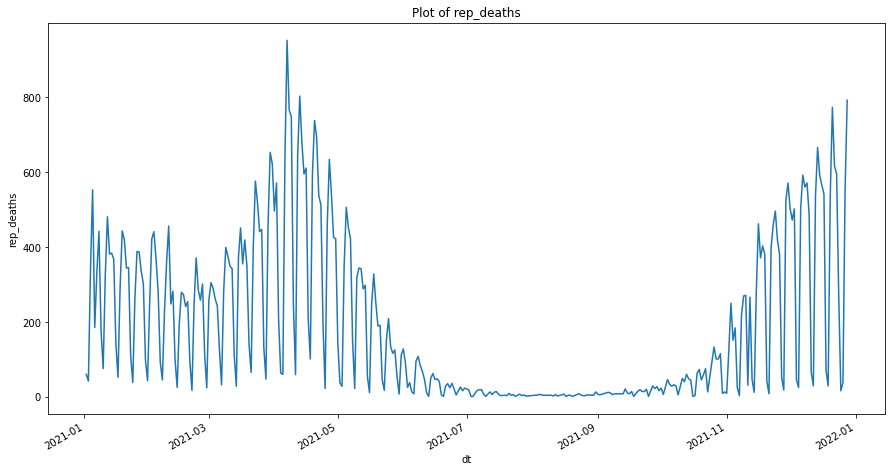

In [139]:
pd_series_stats(df_daily, True)

In [31]:
# 2. agg daily - F/M
df_daily_sex = df.groupby(['dt','sex'])['rep_deaths'].sum()
df_daily_sex

dt          sex
2021-01-02  m       38
            w       22
2021-01-03  m       26
            w       16
2021-01-04  m      199
                  ... 
2021-12-26  w       22
2021-12-27  m      272
            w      277
2021-12-28  m      405
            w      387
Name: rep_deaths, Length: 655, dtype: Int64

In [130]:
# deaths daily (7-day avg)
df_7_d_w = (df[df['sex']=='w']['rep_deaths']
    .groupby(['dt'])
    .sum()
    .rolling(window=7)
    .mean()
         )

df_7_d_m = (df[df['sex']=='m']['rep_deaths']
    .groupby(['dt'])
    .sum()
    .rolling(window=7)
    .mean()
         )

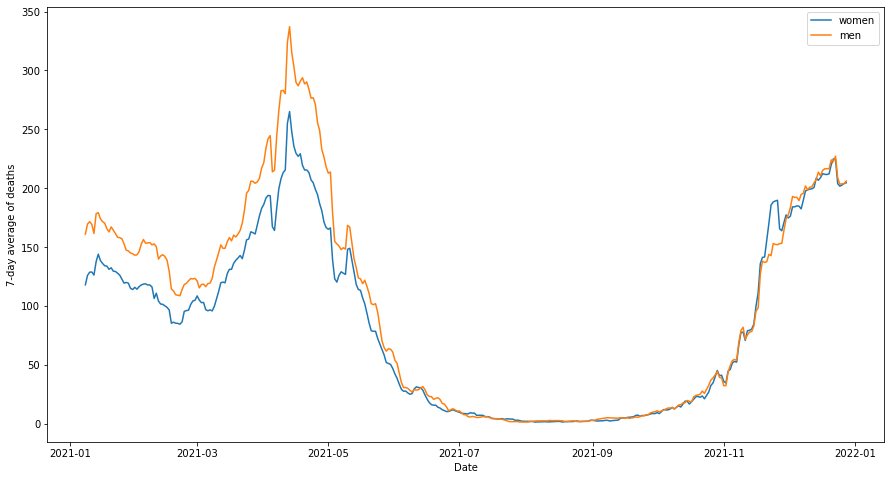

In [134]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(df_7_d_w.index, df_7_d_w, label='women')
ax.plot(df_7_d_m.index, df_7_d_m, label='men')

ax.set_xlabel("Date")
ax.set_ylabel("7-day average of deaths")
ax.legend()

plt.show()